In [1]:
import pathlib
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
import torch
from fastai.vision.all import *

In [2]:
print(torch.__version__)
import fastai
print(fastai.__version__)

2.5.1
2.7.18


In [5]:
#!ls ~/data/bears
HOME = os.getenv("HOME")
path = Path(HOME+"/data/bears")
path.ls()

(#4) [Path('/Users/ivostoyanov/data/bears/teddys'),Path('/Users/ivostoyanov/data/bears/.DS_Store'),Path('/Users/ivostoyanov/data/bears/grizzly'),Path('/Users/ivostoyanov/data/bears/black')]

In [6]:
files = get_image_files(path)
len(files)

523

In [7]:
failed = verify_images(files)

print("failed", len(failed))
# to delete invalid files
failed.map(Path.unlink)

print(len(files))
print(files[0], files[-1])

failed 0
523
/Users/ivostoyanov/data/bears/teddys/00000158.jpg /Users/ivostoyanov/data/bears/black/00000141.jpg


In [10]:
bears = DataBlock(blocks=[ImageBlock, CategoryBlock],
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=42),
                  get_y=parent_label,
                  item_tfms=[Resize(128, ResizeMethod.Squish)])

dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

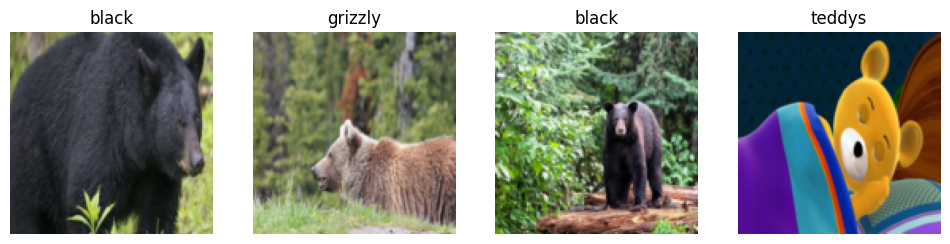

what we normally do in practice is to randomly select part of
the image and then crop to just that part. On each epoch (which is one
complete pass through all of our images in the dataset), we randomly
select a different part of each image. This means that our model can
learn to focus on, and recognize, different features in our images. It
also reflects how images work in the real world: different photos of the
same thing may be framed in slightly different ways

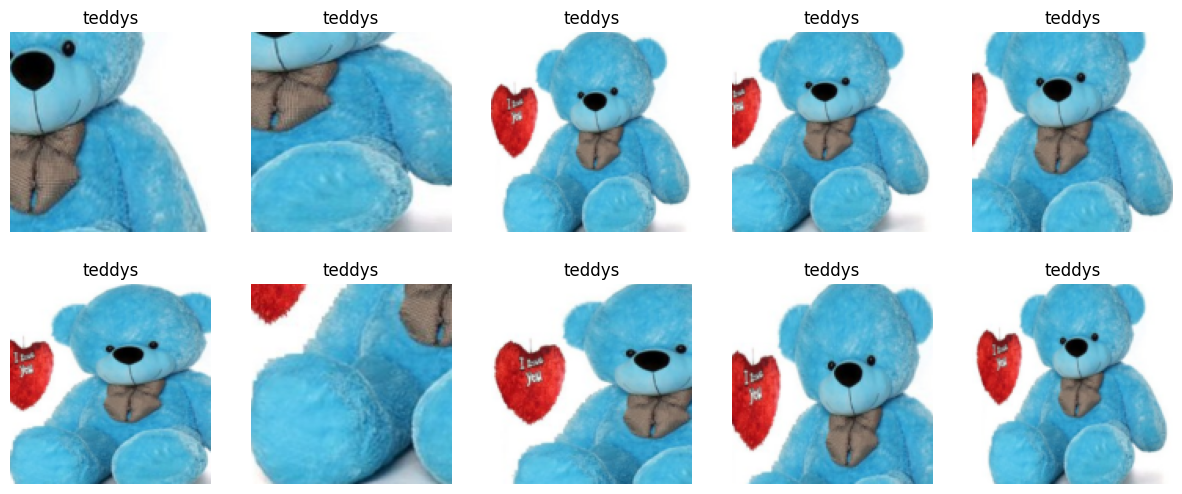

In [23]:
bears = DataBlock(blocks=[ImageBlock, CategoryBlock],
                  get_items=get_image_files,
                  splitter=RandomSplitter(valid_pct=0.2, seed=40),
                  get_y=parent_label)

bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls.train.show_batch(max_n=10, nrows=2, unique=True)


In [14]:
from dotenv import load_dotenv
load_dotenv()
print("PYTORCH_ENABLE_MPS_FALLBACK", os.getenv("PYTORCH_ENABLE_MPS_FALLBACK"))

PYTORCH_ENABLE_MPS_FALLBACK 1


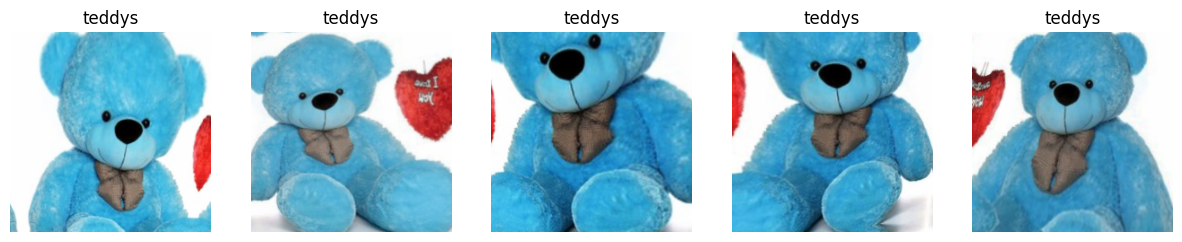

In [30]:
# data augmentation

bears = bears.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique=True)

In [33]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.226469,0.249267,0.057692,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.173950,0.240328,0.048077,00:03
1,0.128712,0.302079,0.048077,00:03
2,0.112359,0.311938,0.057692,00:03
3,0.094052,0.296116,0.057692,00:03


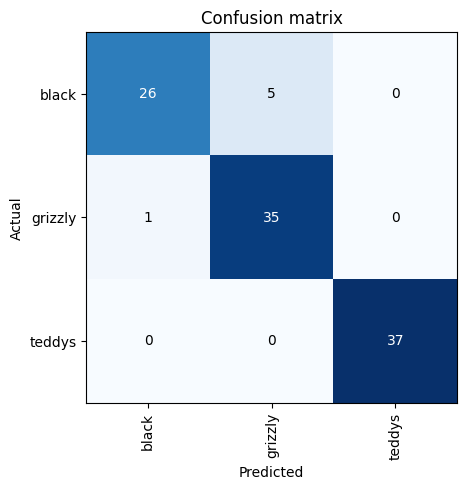

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

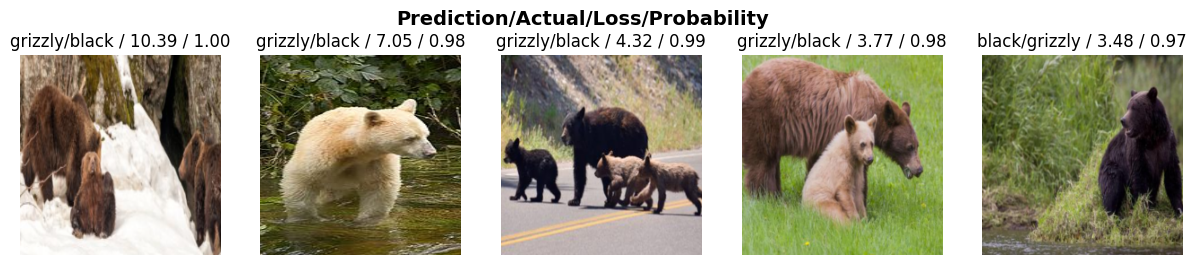

In [35]:
interp.plot_top_losses(5, nrows=1)

In [37]:
from fastai.vision.widgets import ImageClassifierCleaner

cleaner = ImageClassifierCleaner(learn)
cleaner